<a href="https://colab.research.google.com/github/don-rukshan/DE-to-solve-Booth-Function/blob/master/DE_to_solve_Booth_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Auto Stop with the optimal solution**

(array([0.97129881, 3.01127265]), 0.00216584821257524)
(array([0.99972017, 3.00025331]), 1.4528057494917607e-07)
(array([1.00000003, 2.99999998]), 1.9542774599261188e-15)
(array([1., 3.]), 1.1365907922424338e-26)
(array([1., 3.]), 0.0)


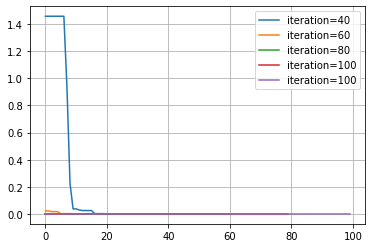

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Dimensions and boundaries
bounds = [(-10, 10)] * 2
dimensions = len( bounds )
min_bounds, max_bounds = np.asarray( bounds ).T
bounds_range = np.fabs( min_bounds - max_bounds )

# Control parameters
crossover_probability = 0.7
population_size = 20
donor_multiplier = 0.7

# Populations
population = np.random.rand( population_size, dimensions )  # Initial random population
denormalized_population = min_bounds + population * bounds_range


def de(fobj, its):
    fitness = np.asarray( [fobj( ind ) for ind in denormalized_population] )
    best_idx = np.argmin( fitness )
    best = denormalized_population[best_idx]
    for i in range( its ):
        for j in range( population_size ):
            mutant = mutate( population, population_size, j )
            i_rand = np.random.rand( dimensions )
            cross_points = i_rand < crossover_probability
            if not np.any( cross_points ):
                cross_points[np.random.randint( 0, dimensions )] = True
            trial = np.where( cross_points, mutant, population[j] )
            trial_denorm = min_bounds + trial * bounds_range
            f = fobj( trial_denorm )
            if f < fitness[j]:
                fitness[j] = f
                population[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]


def objective_function(x1, x2):
    return pow( (x1 + 2 * x2 - 7), 2 ) + pow( (2 * x1 + x2 - 5), 2 )


def mutate(pop, pop_size, current_index):
    indexes = [idx for idx in range( pop_size ) if idx != current_index]
    a, b, c = pop[np.random.choice( indexes, 3, replace=False )]
    return np.clip( a + donor_multiplier * (b - c), 0, 1 )


# Calculating optimal solution
optimum = False
iterations = 20
while not optimum:
    result = list( de( lambda x: objective_function( x[0], x[1] ), iterations ) )
    x, f = zip( *result )
    print(result[-1])
    if result[-1][1] == 0:
        optimum = True
    else:
        iterations += 20
    plt.plot( f, label='iteration={}'.format( iterations ) )
plt.grid()
plt.rcParams["figure.figsize"] = (750, 750)
plt.legend()

**Manual Checking**

(array([0.95388423, 3.02623318]), 0.004396113851650085)
(array([0.99908238, 3.00012905]), 3.3460495769480616e-06)
(array([1.00002093, 2.9999564 ]), 4.3938700822717066e-09)
(array([1.00000246, 2.99999336]), 1.2023340924545983e-10)
(array([1.00000035, 2.99999961]), 2.844034227115767e-13)
(array([1., 3.]), 7.599191752763452e-18)
(array([1., 3.]), 2.369530508132133e-17)
(array([1., 3.]), 4.917839410068993e-22)
(array([1., 3.]), 1.2315522902911288e-23)
(array([1., 3.]), 1.2549199280255856e-25)
(array([1., 3.]), 0.0)


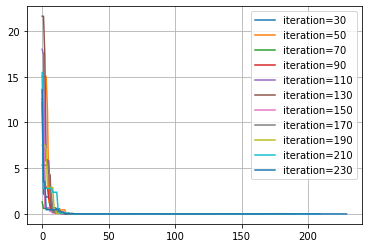

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len( bounds )
    pop = np.random.rand( popsize, dimensions )
    min_b, max_b = np.asarray( bounds ).T
    diff = np.fabs( min_b - max_b )
    pop_denorm = min_b + pop * diff
    fitness = np.asarray( [fobj( ind ) for ind in pop_denorm] )
    best_idx = np.argmin( fitness )
    best = pop_denorm[best_idx]
    for i in range( its ):
        for j in range( popsize ):
            idxs = [idx for idx in range( popsize ) if idx != j]
            a, b, c = pop[np.random.choice( idxs, 3, replace=False )]
            mutant = np.clip( a + mut * (b - c), 0, 1 )
            cross_points = np.random.rand( dimensions ) < crossp
            if not np.any( cross_points ):
                cross_points[np.random.randint( 0, dimensions )] = True
            trial = np.where( cross_points, mutant, pop[j] )
            trial_denorm = min_b + trial * diff
            f = fobj( trial_denorm )
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]


def f_obj(x1, x2):
    return pow( (x1 + 2 * x2 - 7), 2 ) + pow( (2 * x1 + x2 - 5), 2 )


for d in range( 30, 250, 20 ):
    result = list( de( lambda x: f_obj( x[0], x[1] ), bounds=[(-10, 10)] * 2, its=d ) )
    x, f = zip( *result )
    plt.plot( f, label='iteration={}'.format( d ) )

    print(result[-1])
plt.grid()
plt.rcParams["figure.figsize"] = (750, 750)
plt.legend()

***Not Working properly***

(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)
(array([-10., -10.]), -144.0)


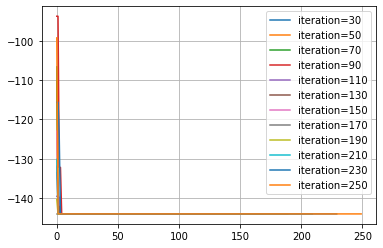

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]


def fobj(x1, x2):
    value = (x1 + 2 * x2 - 7) * 2 + (2 * x1 + x2 - 5) * 2
    # x1 = np.linspace(-10, 10, 30)
    # x2 = np.linspace(-10, 10, 30)

    # X, Y = np.meshgrid(x1, x2)
    # Z = z_function(X, Y)
    # ax = plt.axes(projection='3d')
    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
    #             cmap='winter', edgecolor='none')
    return value

for d in range(30, 270, 20):
   result = list(de(lambda x: fobj(x[0], x[1]), bounds=[(-10, 10)]*2 , its=d))
   x, f = zip(*result)
   plt.plot(f, label='iteration={}'.format(d))
   
   print(result[-1])
plt.grid() 
plt.rcParams["figure.figsize"] = (750,750) 
plt.legend()